In [ ]:
pip install tensorflow

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
input_path = '/content/drive/MyDrive/colab/cnn_image_classification/Copy of input.csv'
X_train = np.loadtxt(input_path, delimiter=',')

In [ ]:
label = '/content/drive/MyDrive/colab/cnn_image_classification/Copy of labels.csv'
Y_train = np.loadtxt(label, delimiter=',')
input_test = '/content/drive/MyDrive/colab/cnn_image_classification/Copy of input_test.csv'
X_test = np.loadtxt(input_test, delimiter=',')
labels_test = '/content/drive/MyDrive/colab/cnn_image_classification/Copy of labels_test.csv'
Y_test = np.loadtxt(labels_test, delimiter=',')

In [ ]:
X_train = X_train.reshape(len(X_train),100,100,3)
Y_train = Y_train.reshape(len(Y_train),1)

X_test = X_test.reshape(len(X_test),100,100,3)
Y_test = Y_test.reshape(len(Y_test),1)

X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
print("Shape of X_train",X_train.shape)
print("Shape of Y_train",Y_train.shape)
print("Shape of X_test",X_test.shape)
print("Shape of Y_test",Y_test.shape)


Shape of X_train (2000, 100, 100, 3)
Shape of Y_train (2000, 1)
Shape of X_test (400, 100, 100, 3)
Shape of Y_test (400, 1)


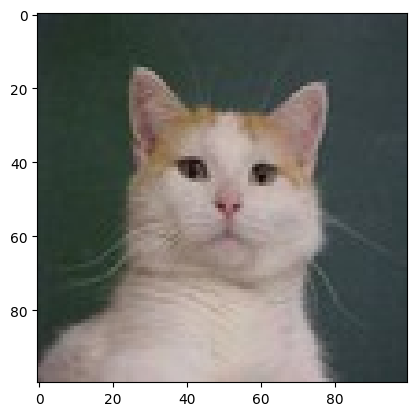

In [ ]:
idx = 1459
# random.randint(0,len(X_train))
plt.imshow(X_train[idx,:])

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),

    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.4876 - loss: 0.8031
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 25s 772ms/step - accuracy: 0.5508 - loss: 0.6867
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 40s 735ms/step - accuracy: 0.5878 - loss: 0.6594
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 26s 813ms/step - accuracy: 0.6062 - loss: 0.6588
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 25s 786ms/step - accuracy: 0.7064 - loss: 0.5863
